In [61]:
# imports
import scipy
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.neighbors
import sklearn.ensemble
import sklearn.metrics
import our_knn
import test_functions

%matplotlib ipympl
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
plt.close('all')

# Thyroid dataset analysys and tests

In [25]:
# labels are 0 1 where 1 is anomaly. Feature 1 is an integer. Other features are continuos
thyroid_data = pd.read_csv('thyroid.csv') 

In [26]:
# load thyroid dataset
thyroid_data_columns = thyroid_data.columns
thyroid_features = thyroid_data[thyroid_data_columns[:6]]
thyroid_labels = thyroid_data[thyroid_data_columns[6]]

# change labels so 1 in no anomalyand -1 is anomaly (sklearn anomaly detecion convention)
thyroid_labels[thyroid_labels == 1] = -1
thyroid_labels[thyroid_labels == 0] = 1

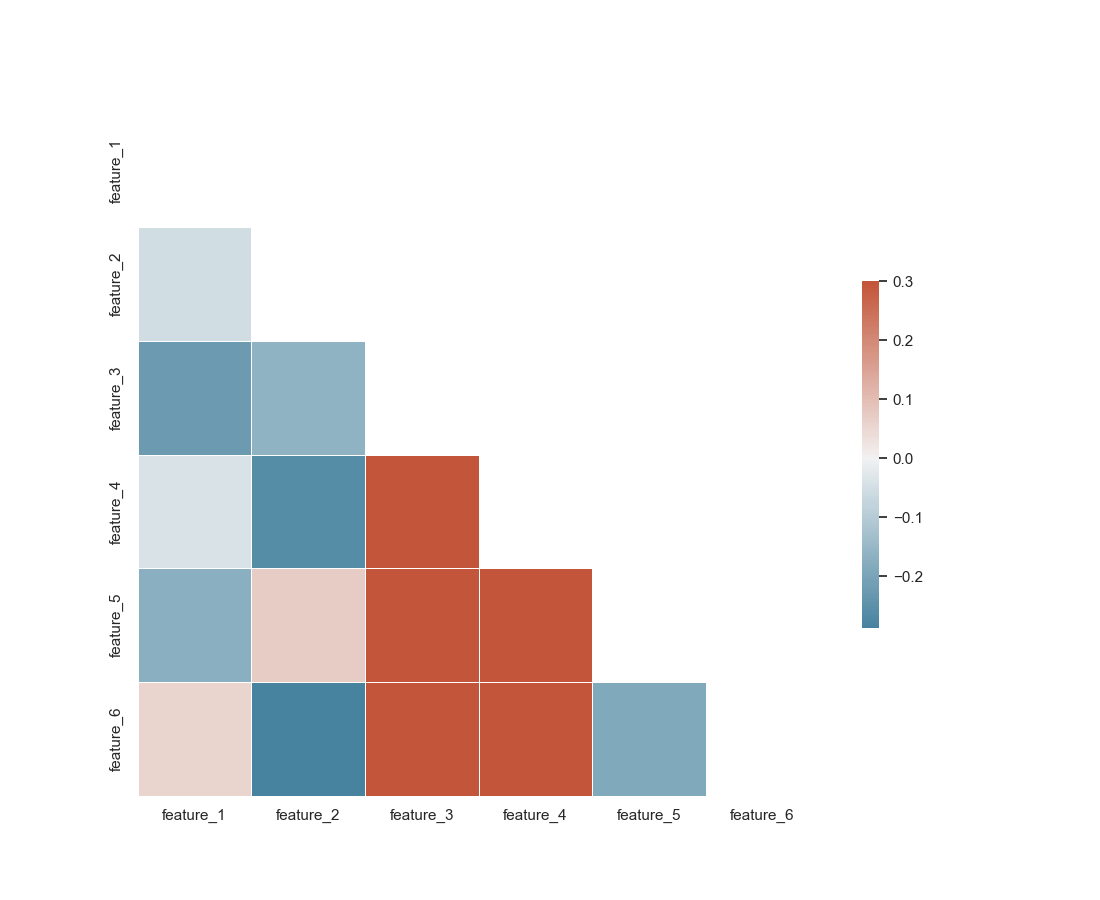

In [27]:
test_functions.plot_corr(thyroid_features)

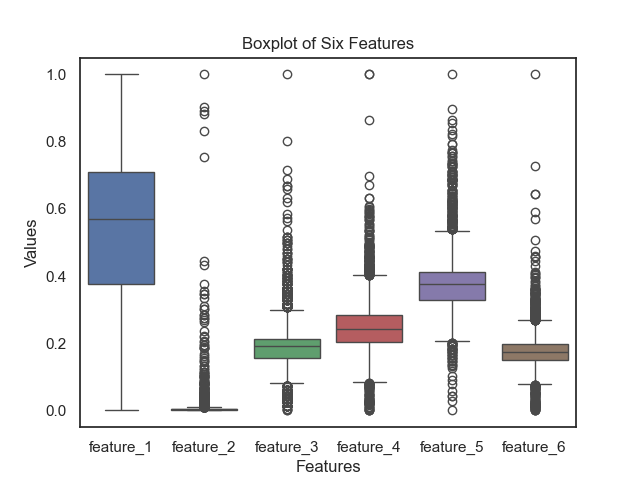

In [28]:
test_functions.plot_feature_dist(thyroid_features)

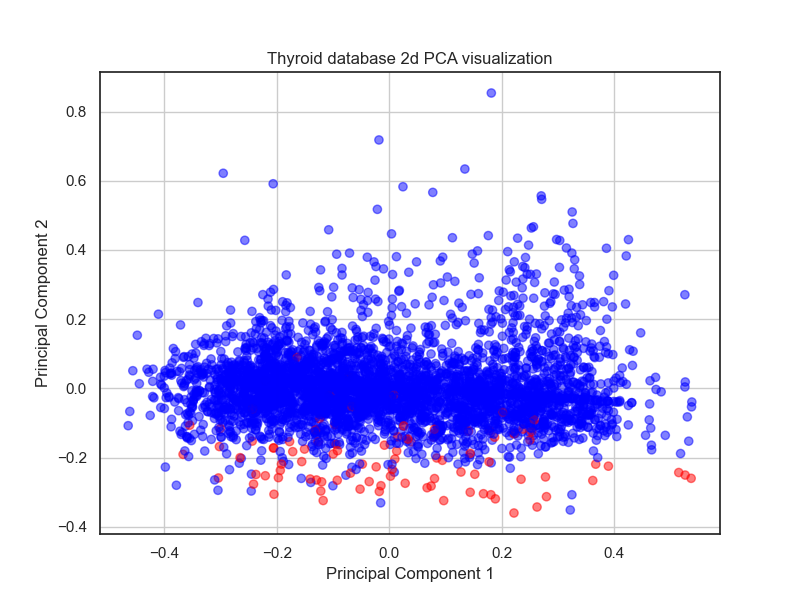

In [29]:
test_functions.plot_pca_results(thyroid_features, thyroid_labels, "Thyroid database 2d PCA visualization")

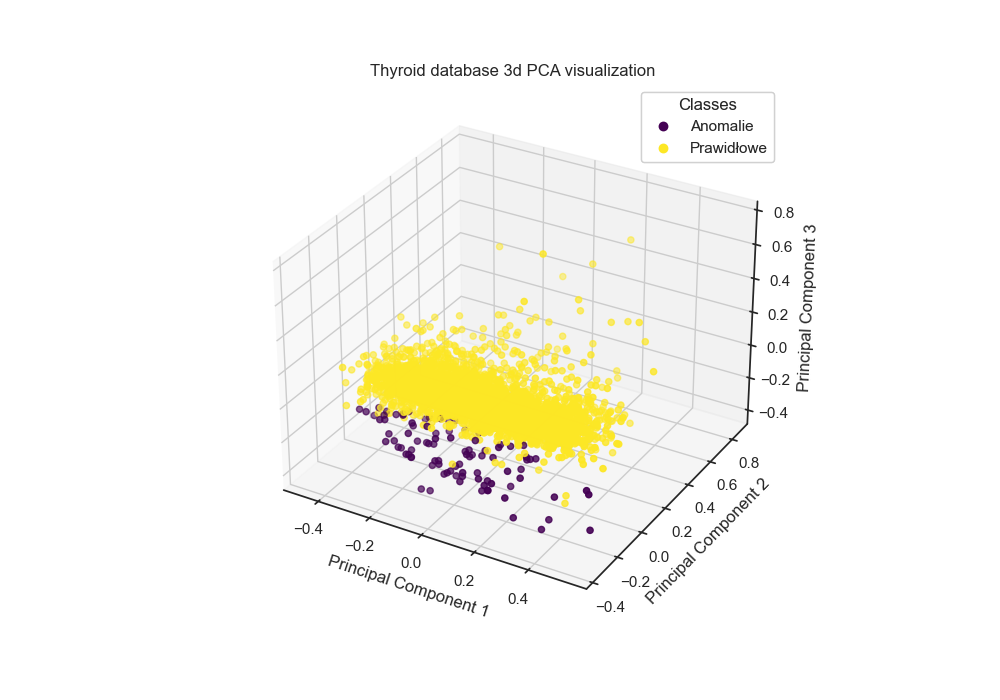

In [74]:
test_functions.plot_pca_3d(thyroid_features, thyroid_labels, "Thyroid database 3d PCA visualization")

In [31]:
# LOF
lof_thyroid = sklearn.neighbors.LocalOutlierFactor(n_neighbors=80)
LOF_predictions = lof_thyroid.fit_predict(thyroid_features)

# f1 for sanity (i know how to use it)
sklearn.metrics.f1_score(thyroid_labels, LOF_predictions, average='binary')

0.9661443760492444

In [32]:
# isolation forest

isolaton_forest_thyroid = sklearn.ensemble.IsolationForest()
isolaton_forest_predictions = isolaton_forest_thyroid.fit_predict(thyroid_features)

# f1
sklearn.metrics.f1_score(thyroid_labels, isolaton_forest_predictions, average='binary')

0.9630046420030948

In [33]:
# one class SVM

svm_thyroid = sklearn.svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
svm_predictions = svm_thyroid.fit_predict(thyroid_features)

# f1
sklearn.metrics.f1_score(thyroid_labels, svm_predictions, average='binary')

0.9471303364433136

In [71]:
# our KNN

knn = our_knn.KNNAnomalyDetector(k=5)
knn_predictions = knn.fit_predict(thyroid_features)

# f1
sklearn.metrics.f1_score(thyroid_labels, knn_predictions, average='binary')

0.9805521555827553

# Shuttle dataset analysys and tests

In [34]:
# shuttle dataset loading. The dataset cointains 9 features and 7 classes. Class '1' makes up 80% of the dataset. For ourlier detection class '4'is discarted and the other classes are combined. 
shuttle_colnames=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'label']
shuttle_data = pd.read_csv('shuttle.tst', sep=' ', header=None, names=shuttle_colnames)

shuttle_data = shuttle_data[shuttle_data['label'] != 4] # remove class '4'

shuttle_features = shuttle_data[shuttle_colnames[:9]]
shuttle_labels = shuttle_data[shuttle_colnames[9]]

shuttle_labels[shuttle_labels == 1] = 1
shuttle_labels[(shuttle_labels == 2) | (shuttle_labels == 3) | (shuttle_labels == 5) | (shuttle_labels == 6) | (shuttle_labels == 7)] = -1


In [35]:
# LOF

lof_shuttle = sklearn.neighbors.LocalOutlierFactor(n_neighbors=80)
LOF_predictions_shuttle = lof_shuttle.fit_predict(shuttle_features)

# f1 for sanity (i know how to use it)
sklearn.metrics.f1_score(shuttle_labels, LOF_predictions_shuttle, average='binary')

0.9634582623509369

In [36]:
# isolation forest

isolaton_forest_shuttle = sklearn.ensemble.IsolationForest()
isolaton_forest_predictions_shuttle = isolaton_forest_shuttle.fit_predict(shuttle_features)

# f1
sklearn.metrics.f1_score(shuttle_labels, isolaton_forest_predictions_shuttle, average='binary')

0.9761204668983338

In [37]:
# one class SVM

svm_shuttle = sklearn.svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
svm_predictions_shuttle = svm_shuttle.fit_predict(shuttle_features)

# f1
sklearn.metrics.f1_score(shuttle_labels, svm_predictions_shuttle, average='binary')

0.8144978853152356

# PR Curves

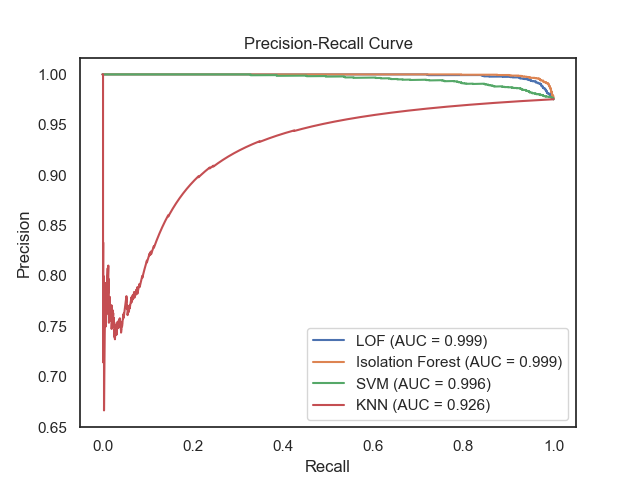

In [72]:
plt.figure()
test_functions.plot_PR_curve(lof_thyroid.negative_outlier_factor_, thyroid_labels, "LOF")
test_functions.plot_PR_curve(isolaton_forest_thyroid.decision_function(thyroid_features) , thyroid_labels, "Isolation Forest")
test_functions.plot_PR_curve(svm_thyroid.decision_function(thyroid_features) , thyroid_labels, "SVM")
test_functions.plot_PR_curve(knn.decision_function(thyroid_features) , thyroid_labels, "KNN")
plt.show()

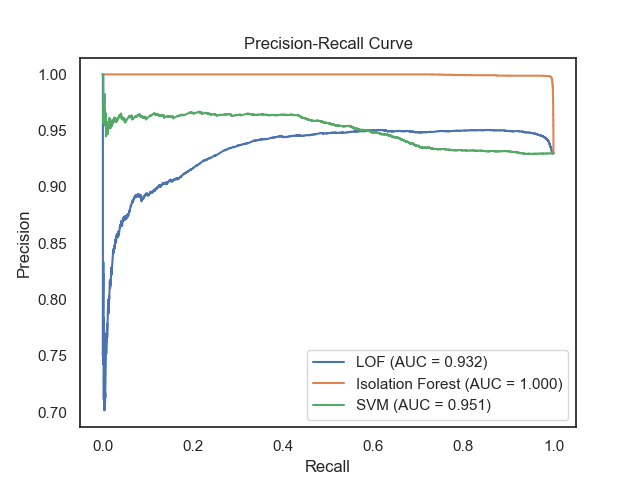

In [47]:
plt.figure()
test_functions.plot_PR_curve(lof_shuttle.negative_outlier_factor_ , shuttle_labels, "LOF")
test_functions.plot_PR_curve(isolaton_forest_shuttle.decision_function(shuttle_features) , shuttle_labels, "Isolation Forest")
test_functions.plot_PR_curve(svm_shuttle.decision_function(shuttle_features) , shuttle_labels, "SVM")
plt.show()